In [1]:
#---------------------------------------------------------------------------------#
# Graduate Program in Software                                                    #
# SEIS 763: Machine Learning                                                      #
# Group project                                                                   #
# Authors: 
# -- Yann Mulonda   
# --
# --
# --                                                                              #
#---------------------------------------------------------------------------------#
import numpy as np
import pandas as pd
from scipy.special import expit
from sklearn import linear_model
import matplotlib.pyplot as plot
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
# get patients data from csv file
# set header to 0 because to exclude the header column
cellDNA = pd.read_csv("./healthcare_data.csv")
# show cell DNA data
cellDNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# show data info
cellDNA.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# show top 10 rows
cellDNA.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

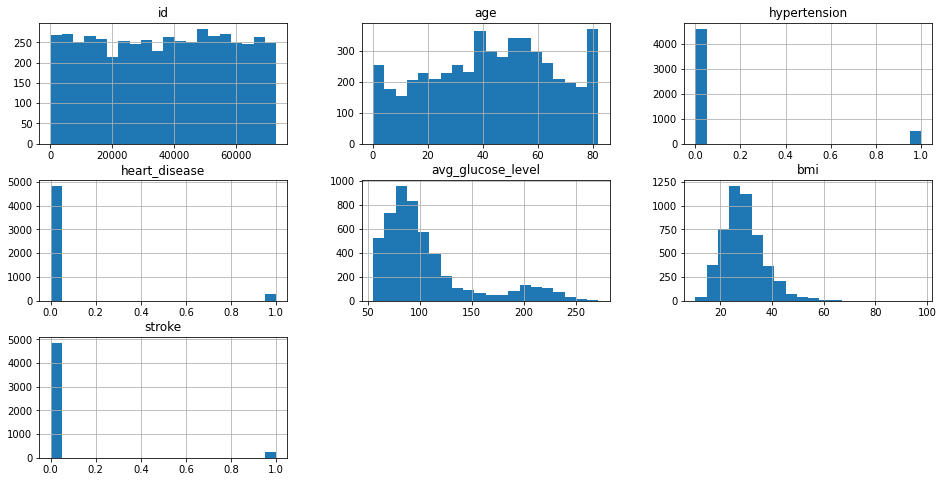

In [5]:
cellDNA.hist(bins=20, figsize=(16,8))

In [6]:
# plot not numeric data
#attributes = ["stroke"]

# get the Y : depedent
cellDNA_Y = cellDNA["stroke"]

# get the X numeric dtat
cellDNA_X_numeric = cellDNA[["age", "avg_glucose_level", "bmi"]]

# get X non data
cellDNA_X_non_numeric = cellDNA[["gender", "work_type", "Residence_type", "smoking_status", "ever_married"]]

# get X binary
cellDNA_X_binary = cellDNA[["hypertension", "heart_disease"]]

In [7]:
# standardized numeric the data
cellDNA_X_numeric_standard = preprocessing.scale(cellDNA_X_numeric, axis=0)
print(cellDNA_X_numeric_standard)

[[ 1.05143428  2.70637544  0.98134488]
 [ 0.78607007  2.12155854         nan]
 [ 1.62639008 -0.0050283   0.45926914]
 ...
 [-0.36384151 -0.51144264  0.21733161]
 [ 0.34379639  1.32825706 -0.41934612]
 [ 0.03420481 -0.46086746 -0.34294479]]


In [8]:
# get mean of numeric data
# mean_numeric_data = cellDNA_X_numeric_standard.mean()
# print("Mean is", mean_numeric_data, sep= " : ")

In [9]:
# standardized non numeric the data
cellDNA_X_non_numeric_stadard = cellDNA_X_non_numeric.select_dtypes(include=[object]).copy()
cellDNA_X_non_numeric_stadard.head()

,gender,work_type,Residence_type,smoking_status,ever_married
0,Male,Private,Urban,formerly smoked,Yes
1,Female,Self-employed,Rural,never smoked,Yes
2,Male,Private,Rural,never smoked,Yes
3,Female,Private,Urban,smokes,Yes
4,Female,Self-employed,Rural,never smoked,Yes


In [10]:
cellDNA_X_non_numeric_stadard_onehot = cellDNA_X_non_numeric_stadard.copy()
cellDNA_X_non_numeric_stadard_onehot = pd.get_dummies(cellDNA_X_non_numeric_stadard, columns=["gender", "work_type", "Residence_type", "smoking_status", "ever_married"], prefix = ["gender", "work_type", "Residence_type", "smoking_status", "ever_married"], drop_first = True)

print(cellDNA_X_non_numeric_stadard_onehot)

      gender_Male  gender_Other  work_type_Never_worked  work_type_Private  \
0               1             0                       0                  1   
1               0             0                       0                  0   
2               1             0                       0                  1   
3               0             0                       0                  1   
4               0             0                       0                  0   
...           ...           ...                     ...                ...   
5105            0             0                       0                  1   
5106            0             0                       0                  0   
5107            0             0                       0                  0   
5108            1             0                       0                  1   
5109            0             0                       0                  0   

      work_type_Self-employed  work_type_children  Residence_ty

In [11]:
# standardized non numeric the data
cellDNA_X_binary_standard_onehot = pd.get_dummies(cellDNA_X_binary, columns= ["hypertension", "heart_disease"], prefix = ["hypertension", "heart_disease"], drop_first = True)

print(cellDNA_X_binary_standard_onehot)

      hypertension_1  heart_disease_1
0                  0                1
1                  0                0
2                  0                1
3                  0                0
4                  1                0
...              ...              ...
5105               1                0
5106               0                0
5107               0                0
5108               0                0
5109               0                0

[5110 rows x 2 columns]


In [12]:
# convert the numer data to data frame
cellDNA_X_numeric_standard_dataframe = pd.DataFrame(cellDNA_X_numeric_standard)
cellDNA_X_numeric_standard_dataframe.columns = ["age", "avg_glucose_level", "bmi"]
print(cellDNA_X_numeric_standard_dataframe.head())

        age  avg_glucose_level       bmi
0  1.051434           2.706375  0.981345
1  0.786070           2.121559       NaN
2  1.626390          -0.005028  0.459269
3  0.255342           1.437358  0.701207
4  1.582163           1.501184 -0.623083


In [13]:
# put all the X data back to together as one dataframe
cellDNA_X_All = pd.concat([cellDNA_X_numeric_standard_dataframe, cellDNA_X_non_numeric_stadard_onehot, cellDNA_X_binary_standard_onehot], axis = 1)

print(cellDNA_X_All)

           age  avg_glucose_level       bmi  gender_Male  gender_Other  \
0     1.051434           2.706375  0.981345            1             0   
1     0.786070           2.121559       NaN            0             0   
2     1.626390          -0.005028  0.459269            1             0   
3     0.255342           1.437358  0.701207            0             0   
4     1.582163           1.501184 -0.623083            0             0   
...        ...                ...       ...          ...           ...   
5105  1.626390          -0.494658       NaN            0             0   
5106  1.670617           0.420775  1.414286            0             0   
5107 -0.363842          -0.511443  0.217332            0             0   
5108  0.343796           1.328257 -0.419346            1             0   
5109  0.034205          -0.460867 -0.342945            0             0   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0       